<h1><center> INTRODUCTION TO ALGORITHMIC TRADING</center></h1>
<h2><center> A PYTHON TUTORIAL</center></h2>

## 1. A FRAMEWORK

### SOURCE: 

**Willem, K (2019). `Introduction to Python in Finance: Algoritmic Trading`** 

https://www.datacamp.com/community/tutorials/finance-python-trading



Technology has become an asset in finance: financial institutions are now evolving to technology companies rather than only staying occupied with just the financial aspect: besides the fact that technology brings about innovation the speeds and can help to gain a competitive advantage, the rate and frequency of financial transactions, together with the large data volumes, makes that financial institutions’ attention for technology has increased over the years and that technology has indeed become the main enabler in finance.

Among the hottest programming languages for finance, you’ll find R and Python, alongside languages such as C++, C#, and Java. In this tutorial, you’ll learn how to get started with Python for finance. The tutorial will cover the following:

Developing a trading strategy is something that goes through a couple of phases, just like when you, for example, build machine learning models: you formulate a strategy and specify it in a form that you can test on your computer, you do some preliminary testing or backtesting, you optimize your strategy and lastly, you evaluate the performance and robustness of your strategy.

Trading strategies are usually verified by backtesting: you reconstruct, with historical data, trades that would have occurred in the past using the rules that are defined with the strategy that you have developed. This way, you can get an idea of the effectiveness of your strategy, and you can use it as a starting point to optimize and improve your strategy before applying it to real markets. Of course, this all relies heavily on the underlying theory or belief that any strategy that has worked out well in the past will likely also work out well in the future, and, that any strategy that has performed poorly in the past will probably also do badly in the future.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance

## 2. IMPORTING AND EXPLORING THE DATA 

At this moment, there is a lot going on in the open-source community because of the changes to the Yahoo! Finance API. That's why you don't only use the `pandas_datareader` package, but also a custom fix `fix_yahoo_finance` to get your data:

In [2]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))
aapl.head()

D:\Program Files\Anaconda\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.305108
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.208156
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.369746
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.301377
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.225556


The `pandas_datareader` offers a lot of possibilities to get financial data. If you don't want to make use of this package, however, you can also use Quandl to retrieve data:

### EXPLORING THE DATA

In [3]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2006-11-01  11.625714  11.194285  11.585714  11.308572  152798100   9.839600
2006-11-02  11.331429  11.214286  11.274285  11.282857  116370800   9.817224
2006-11-03  11.361428  11.112857  11.337143  11.184286  107972200   9.731457
2006-11-06  11.437143  11.204286  11.278571  11.387143  108644200   9.907964
2006-11-07  11.571428  11.447143  11.492857  11.501429  131483100  10.007404
                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2007-01-03  12.368571  11.700000  12.327143  11.971429  309579900  10.416352
2007-01-04  12.278571  11.974286  12.007143  12.237143  211815100  10.647548
2007-01-05  12.314285  12.057143  12.252857  12.150000  208685400  10.571726
2007-01-08  12.361428  12.182858  12.280000  12.210000  199276700  10.623935

### FROM DAILY DATA TO MONTHLY DATA

In [4]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2011-11-23  53.691429  52.411430  53.501427  52.427143  107067800  45.616905
2010-03-30  33.925713  33.464287  33.799999  33.692856  131827500  29.316187
2009-12-04  28.554285  27.182858  28.528572  27.617144  206721200  24.029699
2011-06-30  48.018570  47.548573  47.814285  47.952858   80738700  41.723824
2010-11-09  45.900002  44.928570  45.864285  45.154285   95886000  39.288788
2008-01-08  26.065714  24.400000  25.734285  24.464285  380954000  21.286396
2007-11-09  25.017143  23.601429  24.450001  23.624287  381595200  20.555513
2007-02-02  12.178572  11.957143  12.017143  12.107142  155382500  10.534437
2007-11-07  27.525715  26.590000  27.230000  26.614286  248581900  23.157114
2009-04-14  17.167143  16.750000  17.081429  16.901428  113655500  14.705947
2009-07-21  21.918571  21.392857  21.898571  21.644285  218695400  18.832714

### DEFINING A NEW DATA COLUMN

In [5]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

### PLOTTING THE DATA

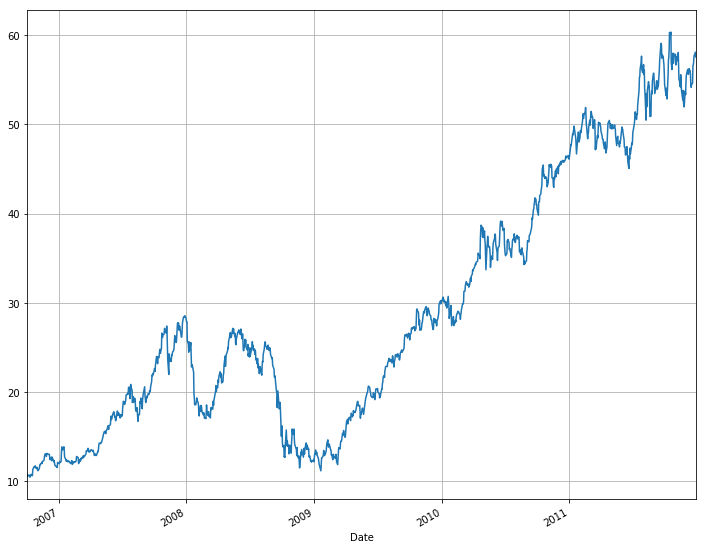

In [6]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True, figsize=(12,10))

# Show the plot
plt.show()

### CALCULATING DAILY RETURNS

In [7]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007297
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]
            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017396
2006-10-05  -0.007324
2006-10-06  -0.008185
...               ...
2011-12-23   0.011922
2011-12-27   0.007903
2011-12-28  -0.009615
2011-12-29   0.006141
2011-12-30  -0.000296

[1323 rows x 1 columns]


### CALCULATING MONTHLY RETURNS

In [8]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.126451,0.121460,0.125777,0.122860,0.369611,0.122860
2007-06-30,0.195413,0.198331,0.196030,0.197735,-0.080296,0.197735
2007-10-31,0.404613,0.392010,0.400961,0.400796,0.306882,0.400796
2008-02-29,0.130711,0.117746,0.127066,0.120394,0.172293,0.120394
2008-06-30,-0.004290,0.005927,-0.003550,0.003673,-0.209762,0.003673
2008-10-31,-0.108879,-0.124618,-0.114267,-0.118803,0.133219,-0.118803
2009-02-28,-0.363388,-0.359305,-0.363639,-0.360865,-0.161601,-0.360865
2009-06-30,0.304359,0.324702,0.312134,0.316588,-0.386935,0.316588


In [9]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007297
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]


### DISTRIBUTION OF DAILY RETURNS

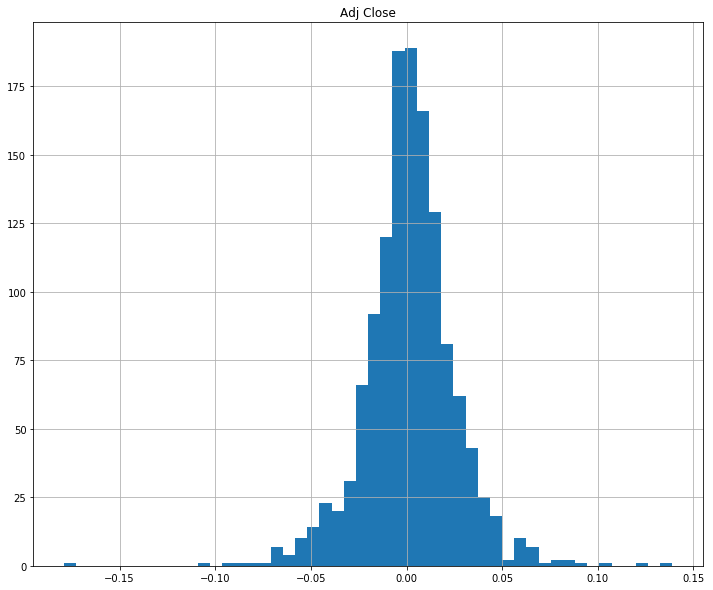

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139049


In [10]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50, figsize=(12,10))

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

### CUMMULATIVE DAILY RETURNS

In [11]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03   0.989581
2006-10-04   1.006947
2006-10-05   0.999599
2006-10-06   0.991451
...               ...
2011-12-23   5.387789
2011-12-27   5.430537
2011-12-28   5.378574
2011-12-29   5.411703
2011-12-30   5.410099

[1323 rows x 1 columns]


### PLOTTING CUMMULATIVE DAILY RETURNS

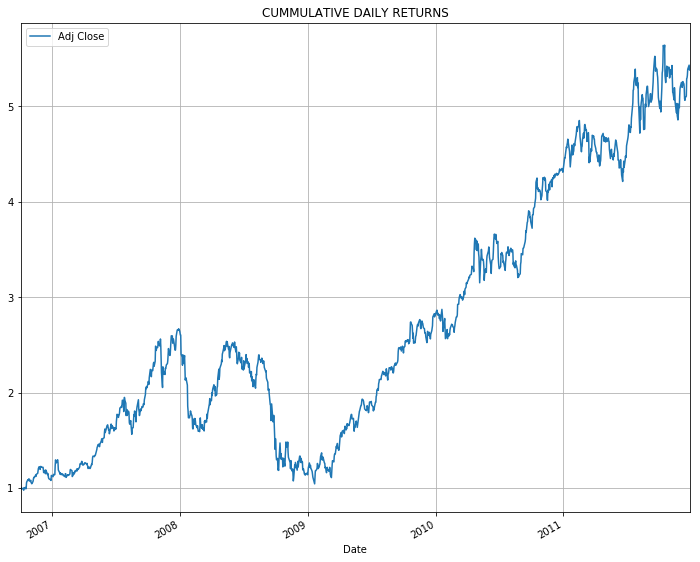

In [12]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,10))

# Show the plot
plt.grid()
plt.title("CUMMULATIVE DAILY RETURNS")
plt.show()

### CUMMULATIVE MONTHLY RETURNS

In [13]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
Date                 
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
...               ...
2011-08-31   5.032896
2011-09-30   5.243032
2011-10-31   5.306305
2011-11-30   5.140465
2011-12-31   5.248871

[63 rows x 1 columns]


### DOWNLOADING MULTIPLE STOCKS : CONCATENATED DATA FRAMES

In [14]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data

High         Low        Open       Close  \
Ticker Date                                                         
AAPL   2006-10-02   10.838572   10.614285   10.728572   10.694285   
       2006-10-03   10.707143   10.455714   10.635715   10.582857   
       2006-10-04   10.780000   10.451428   10.585714   10.768572   
       2006-10-05   10.880000   10.590000   10.647142   10.690000   
       2006-10-06   10.720000   10.544286   10.631429   10.602858   
...                       ...         ...         ...         ...   
GOOG   2011-12-23  316.154968  314.102661  314.819977  315.387848   
       2011-12-27  321.041656  314.819977  314.844879  318.929565   
       2011-12-28  321.295715  317.858582  320.174896  318.655609   
       2011-12-29  320.299438  316.414001  319.547272  320.000549   
       2011-12-30  322.172424  319.811279  319.811279  321.744019   

                        Volume   Adj Close  
Ticker Date                                 
AAPL   2006-10-02  178159800.0    9.305108  
       2006-10-03  197677200.0    9.208156  
       2006-10-04  207270700.0    9.369746  
       2006-10-05  170970800.0    9.301377  
       2006-10-06  116739700.0    9.225556  
...                        ...         ...  
GOOG   2011-12-23    2918200.0  315.387848  
       2011-12-27    3224800.0  318.929565  
       2011-12-28    4270200.0  318.655609  
       2011-12-29    3162500.0  320.000549  
       2011-12-30    3577800.0  321.744019  

[5292 rows x 6 columns]

### HISTOGRAMS OF DAILY RETURNS

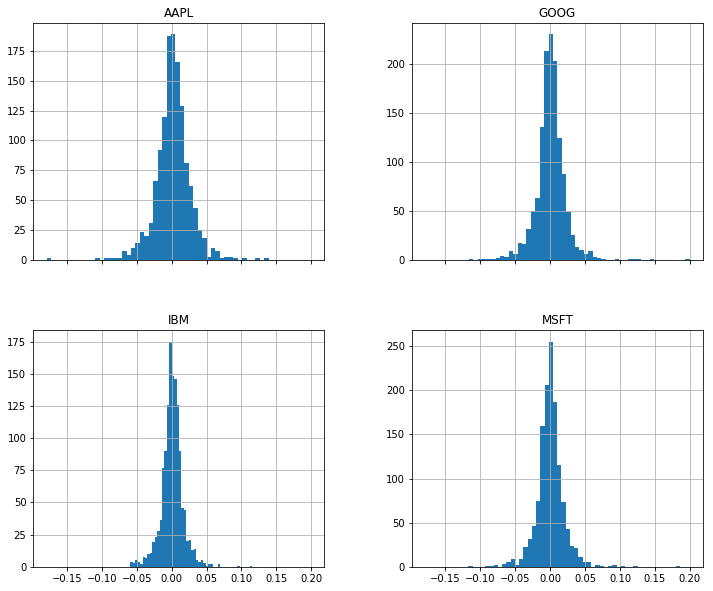

In [15]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,10))

# Show the resulting plot

plt.show()

### MULTIPLE SCATTER PLOTS

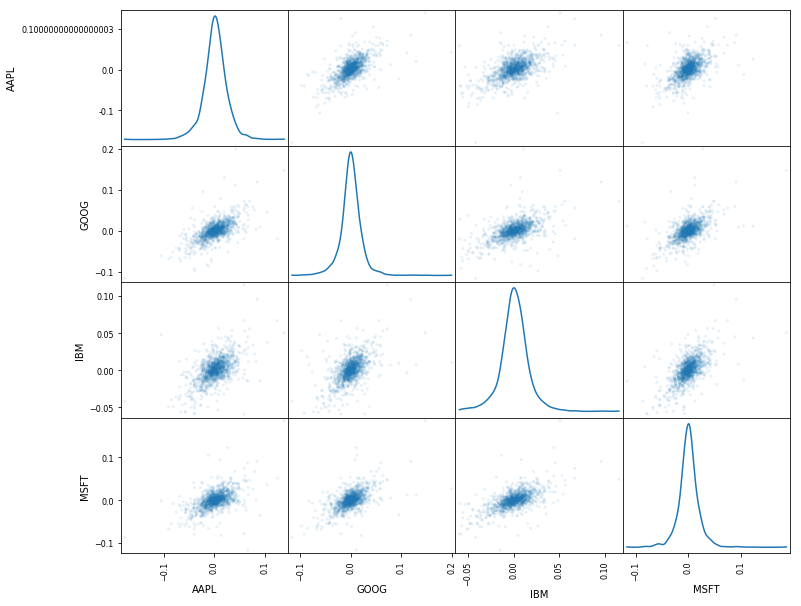

In [16]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,10))

# Show the plot
plt.show()

### MOVING WINDOWS

In [17]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2011-12-16    48.316426
2011-12-19    48.283300
2011-12-20    48.252784
2011-12-21    48.248683
2011-12-22    48.242312
2011-12-23    48.238086
2011-12-27    48.242995
2011-12-28    48.236345
2011-12-29    48.263101
2011-12-30    48.286687
Name: Adj Close, dtype: float64

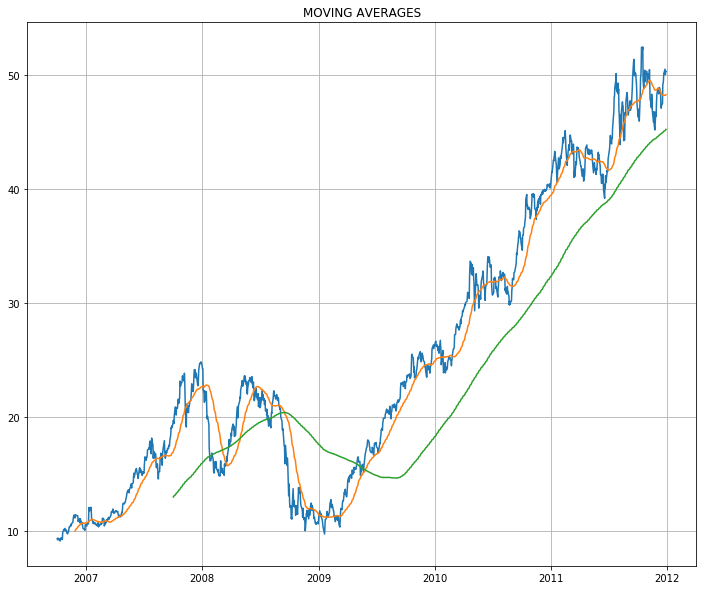

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

fig=plt.figure(figsize=(12,10))
plt.title("MOVING AVERAGES")
# Plot the adjusted closing price, the short and long windows of rolling means
plt.plot(aapl[['Adj Close', '42', '252']])
plt.grid()
plt.show()

### VOLATILITY CALCULATION

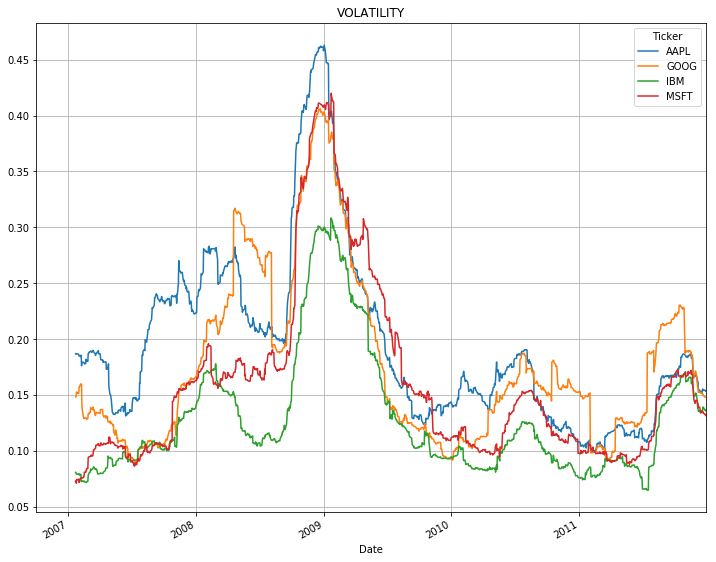

In [19]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(12, 10))
plt.title("VOLATILITY")
plt.grid()
# Show the plot
plt.show()

## 3. USING STATSMODELS FOR OLS REGRESSIONS

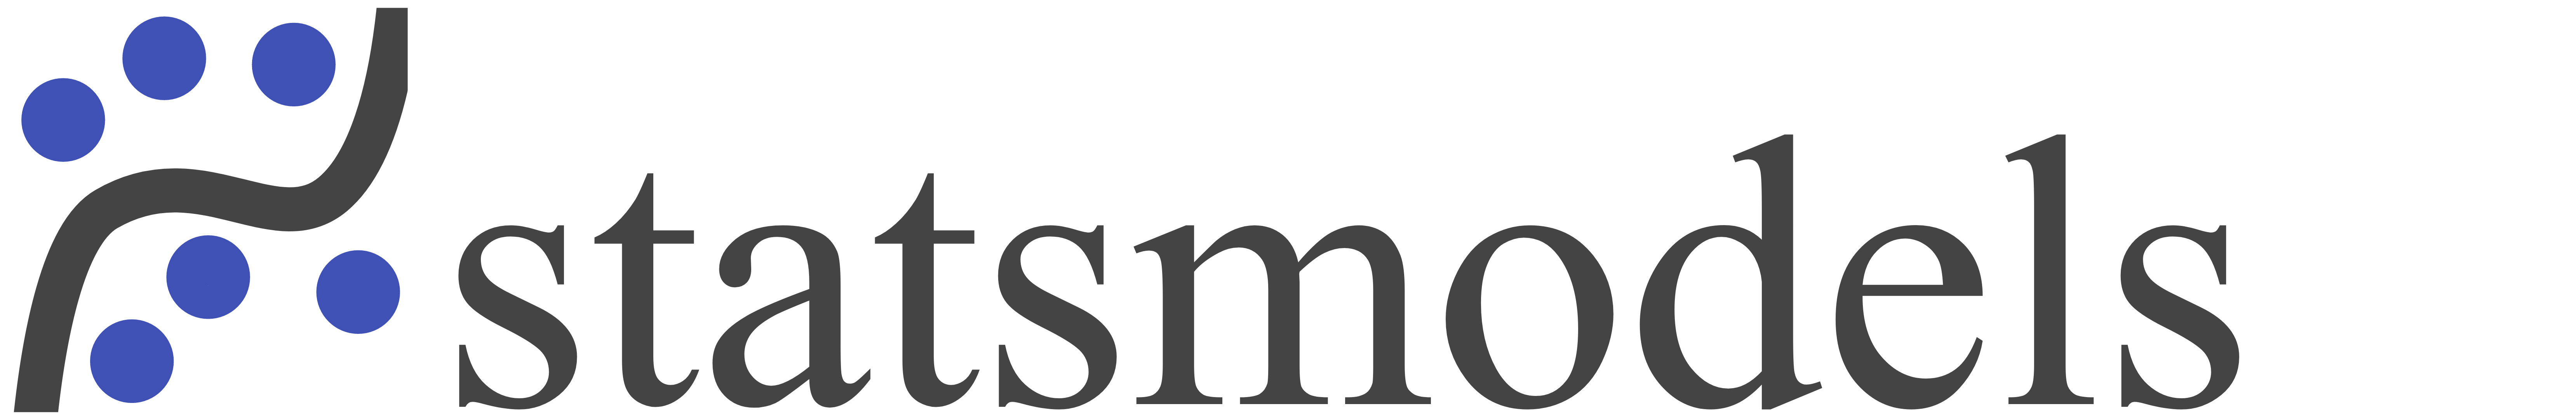

Visit: http://www.statsmodels.org/stable/api.html


The main statsmodels API is split into models:


> - **statsmodels.api:** Cross-sectional models and methods. Canonically imported using import statsmodels.api as sm.

>- **statsmodels.tsa.api:** Time-series models and methods. Canonically imported using import statsmodels.tsa.api as tsa.

>- **statsmodels.formula.api:** A convenience interface for specifying models using formula strings and DataFrames. This API directly exposes the from_formula class method of models that support the formula API. Canonically imported using import statsmodels.formula.api as smf



The API focuses on models and the most frequently used statistical test, and tools. Import Paths and Structure explains the design of the two API modules and how importing from the API differs from directly importing from the module where the model is defined. See the detailed topic pages in the User Guide for a complete list of available models, statistics, and tools.

In [20]:
import numpy as np
import pandas as pd
import statsmodels

In [21]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           1.33e-96
Time:                        17:12:34   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

D:\Program Files\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


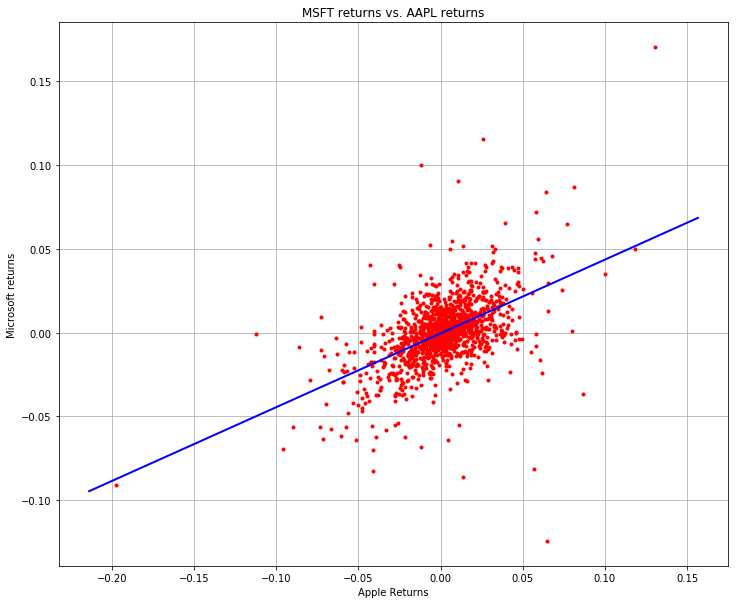

In [22]:
fig=plt.figure(figsize=(12,10))
plt.title("MSFT returns vs. AAPL returns")

plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()

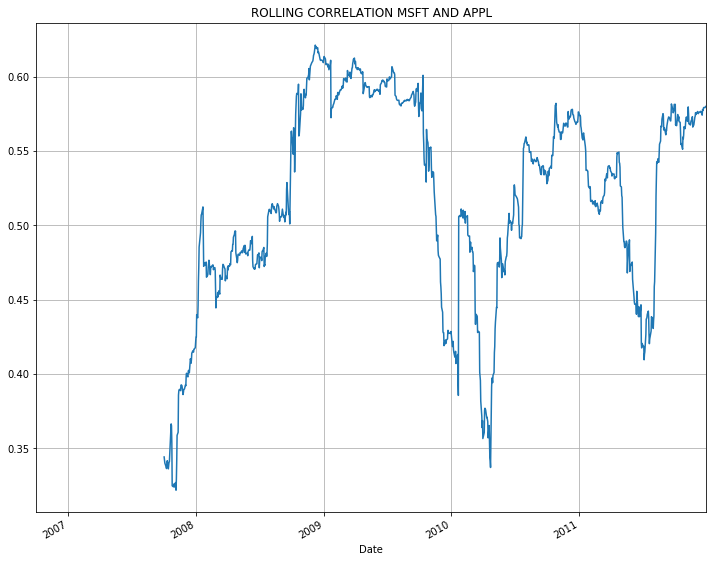

In [23]:
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot(figsize=(12,10))
plt.grid()
plt.title("ROLLING CORRELATION MSFT AND APPL")
plt.show()


## 4. BUILDING A TRADING STRATEGY

### 4.1. TECHNICAL SIGNALS

In [24]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

In [25]:
signals.head(50)

,signal,short_mavg,long_mavg,positions
Date,,,,
2006-10-02,0.0,10.694285,10.694285,NaN
2006-10-03,0.0,10.638571,10.638571,0.0
2006-10-04,0.0,10.681905,10.681905,0.0
2006-10-05,0.0,10.683928,10.683928,0.0
2006-10-06,0.0,10.667714,10.667714,0.0
2006-10-09,0.0,10.666667,10.666667,0.0
2006-10-10,0.0,10.649184,10.649184,0.0
2006-10-11,0.0,10.625714,10.625714,0.0
2006-10-12,0.0,10.639683,10.639683,0.0


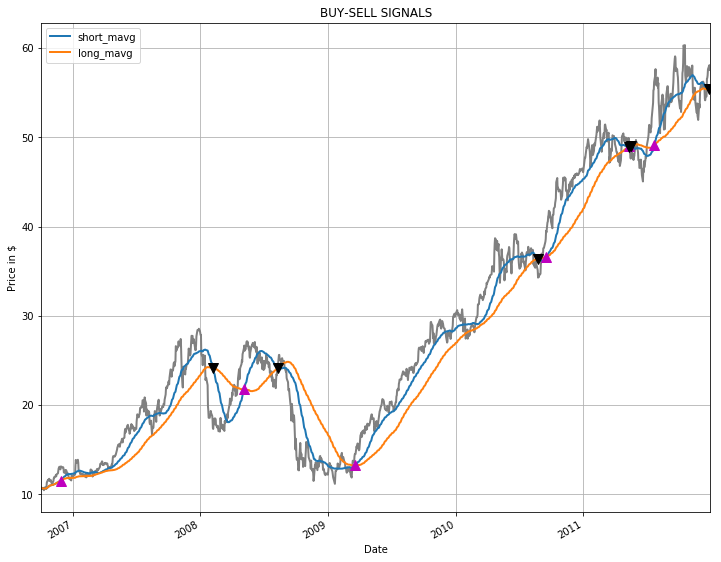

In [35]:
# Initialize the plot figure
fig = plt.figure(figsize=(12,10))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='grey', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')

ax1.grid()
ax1.set_title("BUY-SELL SIGNALS")
         
# Show the plot
plt.show()

.

###  4.2. BACKTESTING



In [27]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

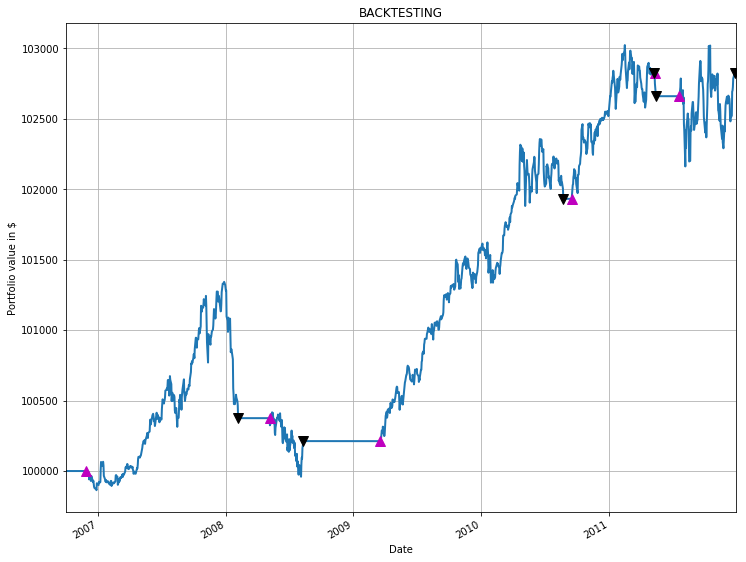

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')
ax1.grid()
ax1.set_title("BACKTESTING")
# Show the plot
plt.show()



### 4.3. SHARPE RATIO

In [29]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print("The Sharpe ratio of the Algorithm is: " + str(sharpe_ratio))

The Sharpe ratio of the Algorithm is: 0.7259152466393987


### 4.4. MAXIMUM DRAWDOWN

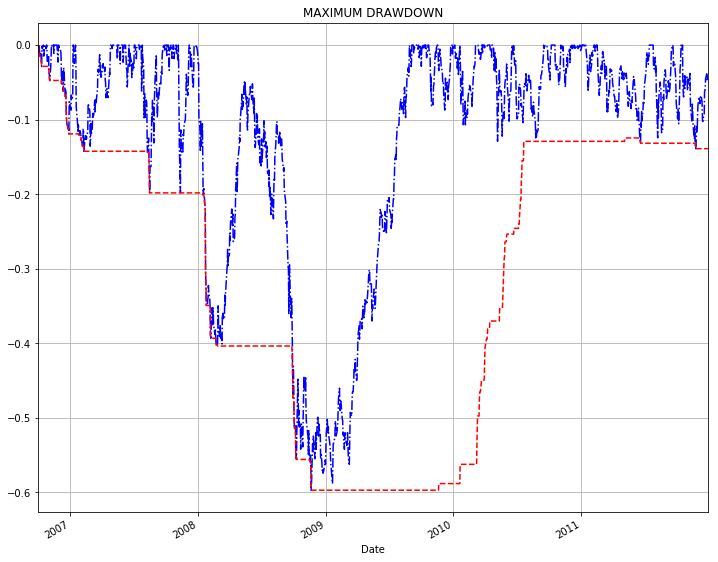

In [30]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results

fig = plt.figure(figsize=(12,10))
plt.grid()
daily_drawdown.plot(color="blue", linestyle="-.")
max_daily_drawdown.plot(color="red", linestyle="--")


# Show the plot
plt.grid(True)
plt.title("MAXIMUM DRAWDOWN")
plt.show()

### 4.5. COMPOUND ANNUAL GROWTH RATE  (CAGR)

In [31]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print("The compound Anual Growhrt Rate of the strategy is:" + str(cagr))

The compound Anual Growhrt Rate of the strategy is:0.3823445209865286
